# Stock Sentiment Analysis using Natural Language Processing


#### Tools and libraries used:

NLP  
Pandas, NumPy, scipy, plotly, seaborn, sklearn, wordcloud, nltk



#### List of the stocks considered:

AAPL = Apple Stock  
BA = Boeing  
T = AT&T  
MGM = MGM Resorts International  
AMZN = Amazon  
IBM = IBM  
TSLA = Tesla Motors  
GOOG = Google   
sp500 = US Stock Market (S&P 500 is a stock market index that measures the stock performance of 500 large companies listed on U.S. stock exchange)


# Stock Sentiment Analysis

In [1]:
# import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS              # may have to pip install
import nltk                                             # may have to pip install
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim                                            # may have to pip install
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import plotly.express as px
import string

# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [2]:
'''
!pip install wordlcloud
!pip install nltk
!pip install gensim
'''

'\n!pip install wordlcloud\n!pip install nltk\n!pip install gensim\n'

In [3]:
# load the stock news data
stock_df = pd.read_csv("https://raw.githubusercontent.com/piyushbiraje/Financial-data-analysis-pb/main/stock_sentiment.csv")

In [4]:
# View the dataset 
stock_df

Text  Sentiment
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1
1     user: AAP MOVIE. 55% return for the FEA/GEED i...          1
2     user I'd be afraid to short AMZN - they are lo...          1
3                                     MNTA Over 12.00            1
4                                      OI  Over 21.37            1
...                                                 ...        ...
5786  Industry body CII said #discoms are likely to ...          0
5787  #Gold prices slip below Rs 46,000 as #investor...          0
5788  Workers at Bajaj Auto have agreed to a 10% wag...          1
5789  #Sharemarket LIVE: Sensex off day’s high, up 6...          1
5790  #Sensex, #Nifty climb off day's highs, still u...          1

[5791 rows x 2 columns]

In [5]:
# dataframe information
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [6]:
# check for null values
stock_df.isnull().sum()

Text         0
Sentiment    0
dtype: int64

#### Data Cleaning


In [7]:
# Let's define a function to remove punctuations
def remove_punc(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)

    return Test_punc_removed_join

In [8]:
# Let's remove punctuations from our dataset 
stock_df['Text Without Punctuation'] = stock_df['Text'].apply(remove_punc)

stock_df

Text  Sentiment  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1   
1     user: AAP MOVIE. 55% return for the FEA/GEED i...          1   
2     user I'd be afraid to short AMZN - they are lo...          1   
3                                     MNTA Over 12.00            1   
4                                      OI  Over 21.37            1   
...                                                 ...        ...   
5786  Industry body CII said #discoms are likely to ...          0   
5787  #Gold prices slip below Rs 46,000 as #investor...          0   
5788  Workers at Bajaj Auto have agreed to a 10% wag...          1   
5789  #Sharemarket LIVE: Sensex off day’s high, up 6...          1   
5790  #Sensex, #Nifty climb off day's highs, still u...          1   

                               Text Without Punctuation  
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...  
1     user AAP MOVIE 55 return for the FEAGEED indic...  
2     user Id be afraid to short AMZN  they are look...  
3                                      MNTA Over 1200    
4                                       OI  Over 2137    
...                                                 ...  
5786  Industry body CII said discoms are likely to s...  
5787  Gold prices slip below Rs 46000 as investors b...  
5788  Workers at Bajaj Auto have agreed to a 10 wage...  
5789  Sharemarket LIVE Sensex off day’s high up 600 ...  
5790  Sensex Nifty climb off days highs still up 2 K...  

[5791 rows x 3 columns]

In [9]:
# download stopwords
nltk.download("stopwords")
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\piyus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [10]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year', 'https'])

In [11]:
# Remove stopwords and remove short words (less than 2 characters)
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) >= 3 and token not in stop_words:
            result.append(token)
            
    return result

In [12]:
# apply pre-processing to the text column
stock_df['Text Without Punc & Stopwords'] = stock_df['Text Without Punctuation'].apply(preprocess)

In [13]:
stock_df['Text Without Punc & Stopwords'][0]

['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'posts']

In [14]:
stock_df

Text  Sentiment  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1   
1     user: AAP MOVIE. 55% return for the FEA/GEED i...          1   
2     user I'd be afraid to short AMZN - they are lo...          1   
3                                     MNTA Over 12.00            1   
4                                      OI  Over 21.37            1   
...                                                 ...        ...   
5786  Industry body CII said #discoms are likely to ...          0   
5787  #Gold prices slip below Rs 46,000 as #investor...          0   
5788  Workers at Bajaj Auto have agreed to a 10% wag...          1   
5789  #Sharemarket LIVE: Sensex off day’s high, up 6...          1   
5790  #Sensex, #Nifty climb off day's highs, still u...          1   

                               Text Without Punctuation  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...   
1     user AAP MOVIE 55 return for the FEAGEED indic...   
2     user Id be afraid to short AMZN  they are look...   
3                                      MNTA Over 1200     
4                                       OI  Over 2137     
...                                                 ...   
5786  Industry body CII said discoms are likely to s...   
5787  Gold prices slip below Rs 46000 as investors b...   
5788  Workers at Bajaj Auto have agreed to a 10 wage...   
5789  Sharemarket LIVE Sensex off day’s high up 600 ...   
5790  Sensex Nifty climb off days highs still up 2 K...   

                          Text Without Punc & Stopwords  
0     [kickers, watchlist, xide, tit, soq, pnk, cpw,...  
1     [movie, return, feageed, indicator, trades, aw...  
2     [afraid, short, amzn, looking, like, nearmonop...  
3                                                [mnta]  
4                                                    []  
...                                                 ...  
5786  [industry, body, cii, said, discoms, likely, s...  
5787  [gold, prices, slip, investors, book, profits,...  
5788  [workers, bajaj, auto, agreed, wage, cut, peri...  
5789  [sharemarket, live, sensex, high, points, nift...  
5790  [sensex, nifty, climb, days, highs, still, key...  

[5791 rows x 4 columns]

Plotting a Word-cloud:

In [15]:
# join the words into a string
stock_df['Text Without Punc & Stopwords Joined'] = stock_df['Text Without Punc & Stopwords'].apply(lambda x: " ".join(x))

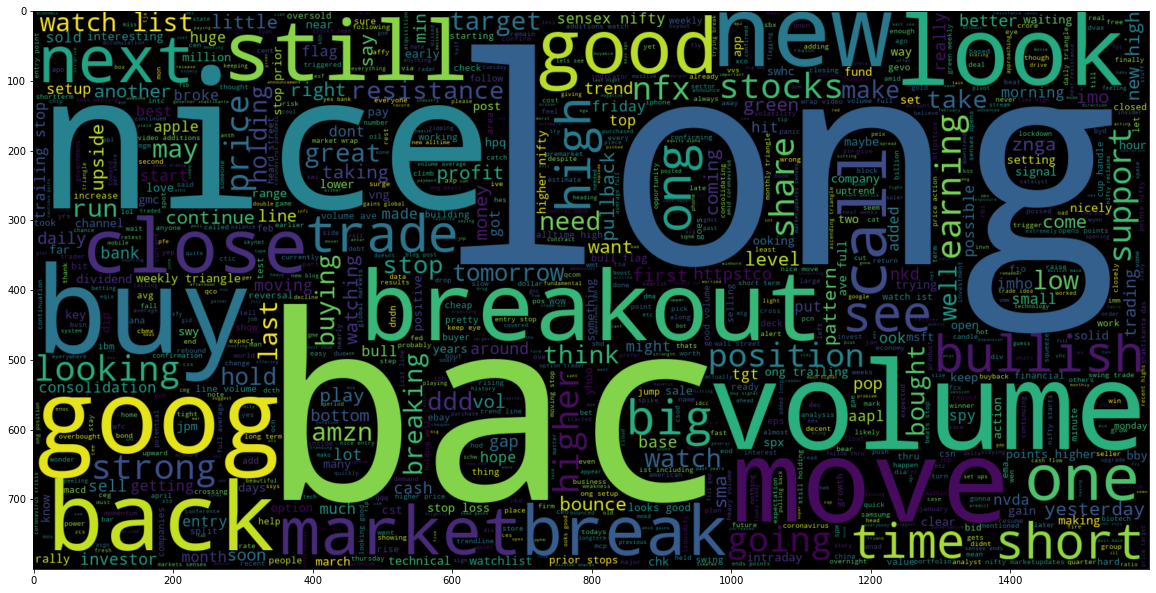

In [16]:
# plot the word cloud for text with positive sentiment
plt.figure(figsize = (20, 20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(stock_df[stock_df['Sentiment'] == 1]['Text Without Punc & Stopwords Joined']))
plt.imshow(wc, interpolation = 'bilinear');

#### Visualize cleaned datasets:

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\piyus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
# use word_tokenize - to break up a string into words
print(stock_df['Text Without Punc & Stopwords Joined'][0])
print(nltk.word_tokenize(stock_df['Text Without Punc & Stopwords Joined'][0]))

kickers watchlist xide tit soq pnk cpw bpz trade method method see prev posts
['kickers', 'watchlist', 'xide', 'tit', 'soq', 'pnk', 'cpw', 'bpz', 'trade', 'method', 'method', 'see', 'prev', 'posts']


In [19]:
# Obtain the maximum length of data in the document
maxlen = -1
for doc in stock_df['Text Without Punc & Stopwords Joined']:
    tokens = nltk.word_tokenize(doc)
    if(maxlen < len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is:", maxlen)

The maximum number of words in any document is: 20


In [20]:
tweets_length = [ len(nltk.word_tokenize(x)) for x in stock_df['Text Without Punc & Stopwords Joined'] ]
tweets_length

[14,
 6,
 7,
 1,
 0,
 1,
 8,
 13,
 8,
 4,
 10,
 18,
 8,
 8,
 11,
 5,
 12,
 10,
 12,
 4,
 6,
 5,
 2,
 5,
 3,
 10,
 3,
 3,
 9,
 6,
 8,
 10,
 8,
 3,
 10,
 11,
 4,
 8,
 11,
 10,
 10,
 7,
 9,
 8,
 4,
 10,
 8,
 7,
 7,
 9,
 10,
 10,
 8,
 2,
 14,
 12,
 9,
 8,
 1,
 14,
 7,
 11,
 5,
 13,
 6,
 6,
 7,
 6,
 6,
 10,
 9,
 4,
 10,
 13,
 16,
 6,
 9,
 6,
 2,
 11,
 5,
 4,
 9,
 11,
 16,
 4,
 9,
 5,
 6,
 2,
 1,
 5,
 9,
 4,
 7,
 6,
 7,
 10,
 1,
 3,
 9,
 4,
 16,
 8,
 10,
 11,
 18,
 6,
 7,
 13,
 12,
 9,
 3,
 3,
 10,
 10,
 8,
 6,
 8,
 5,
 5,
 8,
 9,
 15,
 3,
 5,
 9,
 18,
 13,
 11,
 3,
 1,
 1,
 2,
 7,
 12,
 12,
 8,
 8,
 10,
 9,
 10,
 15,
 8,
 9,
 9,
 12,
 10,
 6,
 10,
 13,
 4,
 11,
 8,
 15,
 13,
 8,
 12,
 5,
 5,
 3,
 7,
 2,
 4,
 10,
 5,
 6,
 10,
 6,
 16,
 9,
 6,
 5,
 10,
 9,
 10,
 8,
 2,
 10,
 9,
 10,
 12,
 7,
 10,
 7,
 3,
 6,
 5,
 9,
 9,
 4,
 6,
 5,
 4,
 4,
 8,
 10,
 8,
 8,
 13,
 9,
 7,
 10,
 12,
 8,
 6,
 5,
 3,
 10,
 11,
 6,
 9,
 10,
 13,
 10,
 7,
 12,
 7,
 11,
 10,
 4,
 4,
 3,
 10,
 2,
 9,
 10,
 15,
 12,
 10

#### Plot the distribution for the number of words in a text

In [21]:
fig = px.histogram(x = tweets_length, nbins = 50)
fig.show()

In [22]:
# Obtain the total words present in the dataset
list_of_words = []
for i in stock_df['Text Without Punc & Stopwords']:
    for j in i:
        list_of_words.append(j)

list_of_words

['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'posts',
 'movie',
 'return',
 'feageed',
 'indicator',
 'trades',
 'awesome',
 'afraid',
 'short',
 'amzn',
 'looking',
 'like',
 'nearmonopoly',
 'ebooks',
 'mnta',
 'pgnx',
 'current',
 'downtrend',
 'break',
 'otherwise',
 'shortterm',
 'correction',
 'medterm',
 'downtrend',
 'mondays',
 'relative',
 'weakness',
 'nyx',
 'win',
 'tie',
 'tap',
 'ice',
 'int',
 'bmc',
 'aon',
 'chk',
 'biib',
 'goog',
 'ower',
 'trend',
 'line',
 'channel',
 'test',
 'volume',
 'support',
 'watch',
 'tomorrow',
 'ong',
 'entry',
 'assuming',
 'fcx',
 'opens',
 'tomorrow',
 'trigger',
 'buy',
 'still',
 'much',
 'like',
 'setup',
 'really',
 'worries',
 'everyone',
 'expects',
 'market',
 'rally',
 'nowusually',
 'exact',
 'opposite',
 'happens',
 'every',
 'time',
 'shall',
 'see',
 'soon',
 'bac',
 'spx',
 'jpm',
 'gamcos',
 'arry',
 'haverty',
 'apple',
 'extremely',
 'chea

In [23]:
# Obtain the total number of unique words
total_words = len(list(set(list_of_words)))
total_words

9268

In [24]:
# split the data into train and test 
X = stock_df['Text Without Punc & Stopwords']
y = stock_df['Sentiment']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [25]:
X_train.shape,X_test.shape

((5211,), (580,))

In [26]:
X_train

2625                   [fdx, position, watch, list, flag]
304     [amzn, vome, big, boys, grabbing, stocks, high...
1463    [take, profits, tighten, stops, indicating, ma...
434                          [hour, nice, bounce, ichard]
1945                                   [possible, bounce]
                              ...                        
3226    [worked, eric, efkofsky, wouldnt, count, dude,...
2651                           [gae, may, buy, gut, shot]
1107    [positive, goog, earnings, pushed, nqf, higher...
1748    [emn, eastman, stoploss, beating, eastman, sto...
5631    [sensex, surges, points, nifty, touches, finan...
Name: Text Without Punc & Stopwords, Length: 5211, dtype: object

In [27]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(X_train)

# Training data
train_sequences = tokenizer.texts_to_sequences(X_train)

# Testing data
test_sequences = tokenizer.texts_to_sequences(X_test)


In [28]:
train_sequences, test_sequences

([[701, 52, 7, 69, 84],
  [45, 779, 32, 1550, 1910, 26, 16, 126, 175],
  [76, 232, 2484, 157, 1911, 227, 651, 3646, 652, 1551, 1912, 191, 233, 127],
  [606, 12, 109, 3647],
  [176, 109],
  [17, 27, 19, 522, 99, 23, 522, 1913, 976, 274, 45, 233],
  [856, 3648],
  [9, 211, 132, 216, 3, 388, 256],
  [110, 522, 241],
  [21, 28, 167, 107, 16, 3649, 3650],
  [21, 28, 168, 2485, 523, 2486, 1552, 3651, 561, 247, 3652, 3653],
  [3654, 3655, 18, 201, 2487, 3656, 104, 780, 1306, 46, 3657],
  [36, 29, 205, 24, 2488],
  [2489, 93, 49, 3658, 2490, 1914],
  [362, 324, 3659, 177, 362, 303, 158, 3660, 3661, 481, 65],
  [21, 228, 40, 16, 56, 977, 142, 93, 49],
  [66, 978, 304],
  [6, 248, 87, 325, 16, 11, 653, 1915, 3662, 175],
  [3663, 7, 69, 42, 1307, 2, 90, 217],
  [2491, 1553, 2, 522, 241, 12, 121, 3664, 27, 30, 1554],
  [389, 25, 266, 54, 390, 143, 218, 406, 2492, 781, 782, 182],
  [],
  [305, 49, 783, 1117, 3665, 3666, 3667, 3668],
  [1118, 3, 326, 30, 58, 3669, 176, 1308, 339, 340, 144, 607, 148,

In [29]:
# Add padding to training and testing
padded_train = pad_sequences(train_sequences, maxlen = 29, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences, maxlen = 29, truncating = 'post')

for i, doc in enumerate(padded_train[:3]):
     print("The padded encoding for document:", i+1," is:", doc)

# Convert the data to categorical 2D representation
y_train_cat = to_categorical(y_train, 2)
y_test_cat = to_categorical(y_test, 2)

y_train_cat.shape

y_test_cat.shape

y_train_cat

The padded encoding for document: 1  is: [701  52   7  69  84   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0]
The padded encoding for document: 2  is: [  45  779   32 1550 1910   26   16  126  175    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]
The padded encoding for document: 3  is: [  76  232 2484  157 1911  227  651 3646  652 1551 1912  191  233  127
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]


array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [30]:
# Add padding to training and testing
padded_train = pad_sequences(train_sequences, maxlen = 15, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences, maxlen = 15, truncating = 'post')

### Building a custom Deep Neurak Network for Sentiment Ananlysis

In [31]:
# Build model (assign parameters)
# Sequential Model
model = Sequential()

# embedding layer
model.add(Embedding(total_words, output_dim = 512))

# Bi-Directional RNN and LSTM
model.add(LSTM(256))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 512)         4745216   
_________________________________________________________________
lstm (LSTM)                  (None, 256)               787456    
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 5,565,826
Trainable params: 5,565,826
Non-trainable params: 0
_________________________________________________________________


In [32]:
# train the model
model.fit(padded_train, y_train_cat, batch_size = 32, validation_split = 0.2, epochs = 2)

Epoch 1/2
131/131 [==============================] - 21s 160ms/step - loss: 0.5902 - acc: 0.6922 - val_loss: 0.4746 - val_acc: 0.7756
Epoch 2/2
131/131 [==============================] - 19s 149ms/step - loss: 0.3273 - acc: 0.8714 - val_loss: 0.5198 - val_acc: 0.7526


In [33]:
# make prediction
pred = model.predict(padded_test)

# make prediction
prediction = []
for i in pred:
    prediction.append(np.argmax(i))

# list containing original values
original = []
for i in y_test_cat:
    original.append(np.argmax(i))

# acuracy score on text data
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(original, prediction)
accuracy

0.7448275862068966

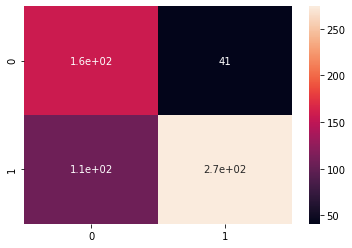

In [34]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(original, prediction)
sns.heatmap(cm, annot = True)